# ExMatrix Method

The Explainable Matrix (ExMatrix) is a novel method for Random Forest (RF) interpretability based on the visual
representations of logic rules. ExMatrix supports global and local explanations of RF models enabling tasks that involve the overview of models and the auditing of classification processes. The key idea is to explore logic rules by demand using matrix visualizations, where rows are rules, columns are features, and cells are rules predicates.

For presenting the method here, the Iris Dataset is employed.

***Cite us***:  M. Popolin Neto and F. V. Paulovich, "Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles," in IEEE Transactions on Visualization and Computer Graphics, vol. 27, no. 2, pp. 1427-1437, Feb. 2021, doi: 10.1109/TVCG.2020.3030354.

***BibTeX:*** @article{PopolinNeto:2020:ExMatrix,
    author={Popolin{ }Neto, Mário and Paulovich, Fernando V.},
    journal={IEEE Transactions on Visualization and Computer Graphics}, 
    title={Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles}, 
    year={2021},
    volume={27},
    number={2},
    pages={1427-1437},
    doi={10.1109/TVCG.2020.3030354}}

## Iris Dataset

In [1]:
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dataset = datasets.load_iris()

X = dataset.data
y = dataset.target

feature_names = dataset.feature_names
target_names = dataset.target_names


sss = list( StratifiedShuffleSplit( n_splits = 1, test_size = 0.30, random_state = 68269 ).split( X, y ) )
train_indexes = sss[ 0 ][ 0 ]
test_indexes = sss[ 0 ][ 1 ]

X_train, X_test = X[ train_indexes ], X[ test_indexes ]
y_train, y_test = y[ train_indexes ], y[ test_indexes ]

## Single Decision Tree

### Decision Tree Creation

In [2]:
kargs = eval( "{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 1988}" )
clf = DecisionTreeClassifier( **kargs )
clf.fit( X_train, y_train )


y_true, y_pred = y_test, clf.predict( X_test )
accuracy = accuracy_score( y_true, y_pred )
print( 'accuracy DT', accuracy )

accuracy DT 0.9111111111111111


#### Decision Tree Node-Link Visualization

In [3]:
from lrmatrix.treevis import nodelink

tree = nodelink( clf, out_file = None, max_depth = None, feature_names = feature_names, class_names = target_names, label = 'all', filled = True, leaves_parallel = False, impurity = False, node_ids = True, proportion = True, rotate = False, rounded = True, special_characters = False, precision = 2 )
tree.write_svg( 'DT.svg' )

True

<!-- ![Alt text](./DT.svg) -->
<img src="./DT.svg" width="450">


### Decision Tree Model Interpretability

In [4]:
from exmatrix import ExplainableMatrix

exm = ExplainableMatrix( n_features = len( feature_names ), n_classes = len( target_names ), feature_names = np.array( feature_names ), class_names = np.array( target_names ) )
exm.rules_extration( [ clf ], X, y, clf.feature_importances_, n_jobs = 1 )
print( 'n_rules DT', exm.n_rules_ )

n_rules DT 4


#### ExMatrix Global Expanation

In [5]:
exp = exm.explanation( info_text = '\nmax-depth 3\n\naccuracy 0.91\nerror 0.09\n' )
exp.create_svg( draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1990, height = 640, margin_bottom = 150 )
exp.save( 'IrisFlowerGE-DT.png', pixel_scale = 5 )
exp.save( 'IrisFlowerGE-DT.svg' )
exp.display_jn()

#### ExMatrix Local Expanation

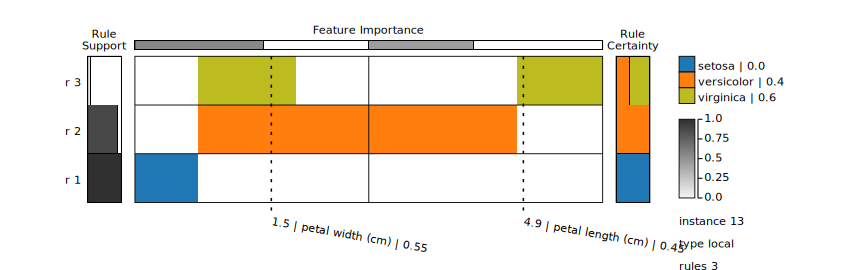

In [6]:
exp = exm.explanation( exp_type = 'local', x_k = X_test[ 13 ], r_order = 'delta change', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 600, margin_bottom = 150 )
exp.save( 'IrisFlowerLE-13-DT.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLE-13-DT.svg' )
exp.display_jn()

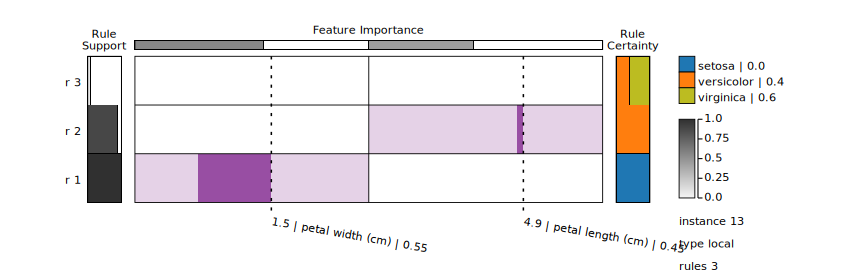

In [7]:
exp = exm.explanation( exp_type = 'local', x_k = X_test[ 13 ], r_order = 'delta change', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_deltas = True, cell_background = 'used', draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 600, margin_bottom = 150 )
exp.save( 'IrisFlowerLEDLT-13-DT.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLEDLT-13-DT.svg' )
exp.display_jn()

## Random Forest

### Random Forest Model Creation

In [8]:
kargs = eval( "{'criterion': 'gini', 'n_estimators': 3, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 68269, 'bootstrap': False}" )
clf = RandomForestClassifier( **kargs )
clf.fit( X_train, y_train )



y_true, y_pred = y_test, clf.predict( X_test )
accuracy = accuracy_score( y_true, y_pred )
print( 'accuracy RF-3', accuracy )

accuracy RF-3 0.9555555555555556


### Random Forest Model Interpretability

In [9]:
from exmatrix import ExplainableMatrix

exm = ExplainableMatrix( n_features = len( feature_names ), n_classes = len( target_names ), feature_names = np.array( feature_names ), class_names = np.array( target_names ) )
exm.rules_extration( clf, X, y, clf.feature_importances_, n_jobs = 3 )
print( 'n_rules RF-3', exm.n_rules_ )

n_rules RF-3 12


### ExMatrix Global Expanation

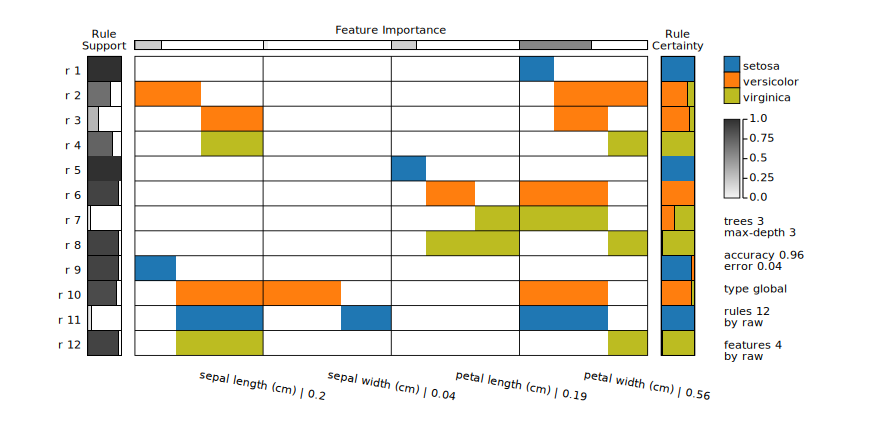

In [10]:
exp = exm.explanation( info_text = '\ntrees 3\nmax-depth 3\n\naccuracy 0.96\nerror 0.04\n' )
exp.create_svg( draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1990, height = 940, margin_bottom = 150 )
exp.save( 'IrisFlowerGE-RF.png', pixel_scale = 5 )
exp.save( 'IrisFlowerGE-RF.svg' )
exp.display_jn()

### ExMatrix Local Expanations for Instance 13

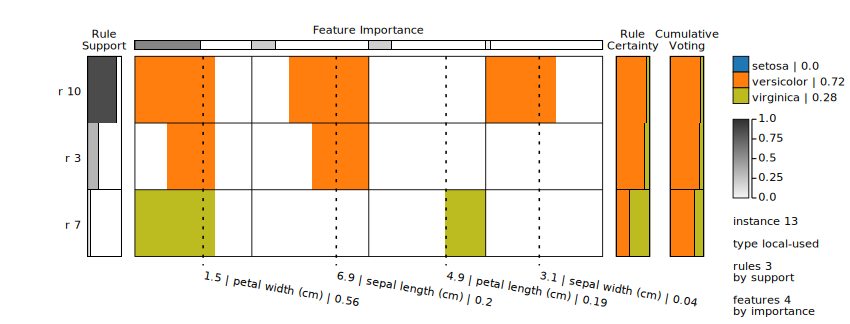

In [11]:
exp = exm.explanation( exp_type = 'local-used', x_k = X_test[ 13 ], r_order = 'support', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 720, margin_bottom = 150 )
exp.save( 'IrisFlowerLEUR-13-RF.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLEUR-13-RF.svg' )
exp.display_jn()

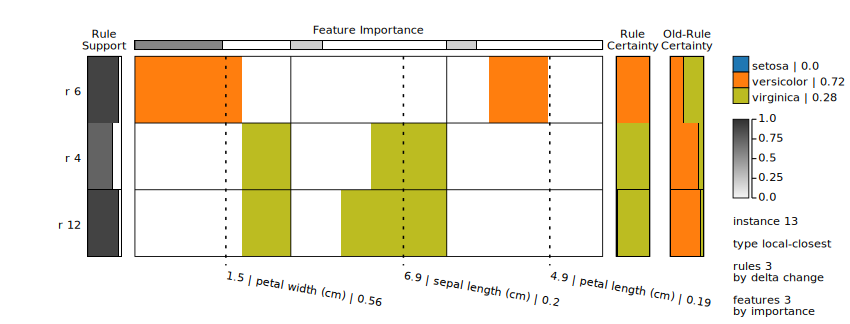

In [12]:
exp = exm.explanation( exp_type = 'local-closest', x_k = X_test[ 13 ], r_order = 'delta change', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_deltas = False, draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 720, margin_bottom = 150 )
exp.save( 'IrisFlowerLESC-13-RF.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLESC-13-RF.svg' )
exp.display_jn()

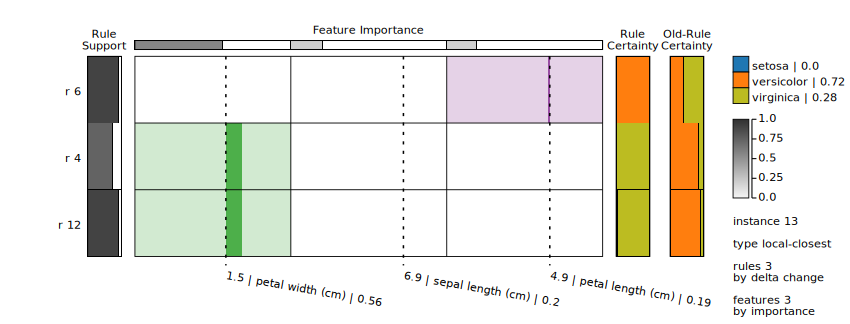

In [13]:
exp = exm.explanation( exp_type = 'local-closest', x_k = X_test[ 13 ], r_order = 'delta change', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_deltas = True, cell_background = 'used', draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 720, margin_bottom = 150 )
exp.save( 'IrisFlowerLESC-13-RF-D.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLESC-13-RF-D.svg' )
exp.display_jn()

## IEEE VIS 2020

The exmatrix method was presented in the IEEE VIS 2020, the premier forum for advances in Visualization and Visual Analytics.

[![IMAGE ALT TEXT](https://popolinneto.gitlab.io/exmatrix/readme/ExMatrixIEEEVIS2020.png)](https://youtu.be/iPL3aIwp2Mc")

## References

ExMatrix uses the [Logic Rules Matrix](https://pypi.org/project/lrmatrix/) package, which also supports the [multiVariate dAta eXplanation - VAX](https://pypi.org/project/vaxm/) method. Both ExMatrix and VAX employ a matrix-like visual metaphor for logic rules visualization, where rules are rows, features (variables) are columns, and rules predicates are cells. 

The ExMatrix must be used for model (predictive) explanations (model interpretability/explainability), while VAX must be employed for data (descriptive) explanations (phenomenon understanding).

[![A flowchart-based summarization.](https://popolinneto.gitlab.io/vaxm/readme/Flowchart.svg "A flowchart-based summarization.")](https://doi.org/10.11606/T.55.2021.tde-03032022-105725)

---

[[1](https://doi.org/10.11606/T.55.2021.tde-03032022-105725)] Popolin Neto, M. (2021). Random Forest interpretability - explaining classification models and multivariate data through logic rules visualizations. Doctoral Thesis, Instituto de Ciências Matemáticas e de Computação, University of São Paulo, São Carlos. doi:10.11606/T.55.2021.tde-03032022-105725. 

***BibTeX:***  @phdthesis{PopolinNeto:2021:Thesis, doi = {10.11606/t.55.2021.tde-03032022-105725}, publisher = {Universidade de Sao Paulo,  Agencia {USP} de Gestao da Informacao Academica ({AGUIA})}, author = {M{\'{a}}rio Popolin{ }Neto}, title = {Random Forest interpretability - explaining classification models and multivariate data through logic rules visualizations}}

---

[[2](https://doi.org/10.1109/TVCG.2020.3030354)] M. Popolin Neto and F. V. Paulovich, "Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles," in IEEE Transactions on Visualization and Computer Graphics, vol. 27, no. 2, pp. 1427-1437, Feb. 2021, doi: 10.1109/TVCG.2020.3030354.

***BibTeX:*** @article{PopolinNeto:2020:ExMatrix, author={Popolin{ }Neto, Mário and Paulovich, Fernando V.}, journal={IEEE Transactions on Visualization and Computer Graphics}, title={Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles}, year={2021}, volume={27}, number={2}, pages={1427-1437}, doi={10.1109/TVCG.2020.3030354}}
    
---

[[3](https://doi.org/10.1109/TVCG.2022.3223529)] M. Popolin Neto and F. V. Paulovich, "Multivariate Data Explanation by Jumping Emerging Patterns Visualization," in IEEE Transactions on Visualization and Computer Graphics, 2022, doi: 10.1109/TVCG.2022.3223529.

***BibTeX:***  @article{PopolinNeto:2022:VAX, author={Popolin{ }Neto, Mário and Paulovich, Fernando V.}, journal={IEEE Transactions on Visualization and Computer Graphics}, title={Multivariate Data Explanation by Jumping Emerging Patterns Visualization}, year={2022}, volume={}, number={}, pages={1-16}, doi={10.1109/TVCG.2022.3223529}}